In [26]:
# Dependencies
from sklearn import datasets
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report
#morgan prukop

## HR Employee Attrition
Keywords: multivariate, classification.

## Description
This dataset is used to evaluae what features lead to employee attrition. This is a fictional data set that was created by IBM data scientists to reflect real world data.

## Source
https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

In [3]:
# Read the csv file into a pandas DataFrame
hr_data = pd.read_csv('../Resources/HREmployeeAttrition.csv')
hr_data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
# Select our independent X variables, and our dependent y variable. 
X = hr_data.drop(columns = ['Attrition'])
y = hr_data['Attrition']

In [5]:
# Confirm imblance of target variable 'Attrition'
# 1 = Attrition; 0 = No Attrition

print("Total Counts:")
print(y.value_counts())
print("")
print("Percentage:")
print(y.value_counts(normalize=True))

Total Counts:
0    1233
1     237
Name: Attrition, dtype: int64

Percentage:
0    0.838776
1    0.161224
Name: Attrition, dtype: float64


### Imbalanced

In [7]:
# Create Validation training and testing datasets without balancing.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [8]:
# Confirm imblance of target variable 'Attrition' in the test dataset
# 1 = Attrition; 0 = No Attrition

print("Total Counts:")
print(y_test.value_counts())
print("")
print("Percentage:")
print(y_test.value_counts(normalize=True))

Total Counts:
0    236
1     58
Name: Attrition, dtype: int64

Percentage:
0    0.802721
1    0.197279
Name: Attrition, dtype: float64


In [9]:
# Create a Linear Regression model object
model = LogisticRegression(solver='liblinear')

In [10]:
# Train the model using the training datasets
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [11]:
# Make predictions using the testing dataset
y_pred = model.predict(X_test)

In [21]:
# Plot the Confusion Matrix values
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[232   4]
 [ 47  11]]


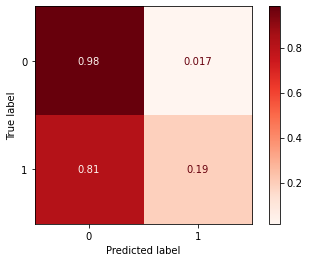

In [24]:
# Plot the Confusion Matrix prediction percentages
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Reds, normalize='true')

In [27]:
# Print classification report
print(classification_report(y_test, y_pred,target_names=["Malignant", "Benign"]))

              precision    recall  f1-score   support

   Malignant       0.83      0.98      0.90       236
      Benign       0.73      0.19      0.30        58

    accuracy                           0.83       294
   macro avg       0.78      0.59      0.60       294
weighted avg       0.81      0.83      0.78       294



### Balanced

In [28]:
# Create our Validation training and testing datasets with balancing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0, stratify=y)

In [29]:
# Confirm imblance of target variable 'Attrition' in our stratified dataset
# 1 = Attrition; 0 = No Attrition
print("Total Counts:")
print(y_test.value_counts())
print("")
print("Percentage:")
print(y_test.value_counts(normalize=True))

Total Counts:
0    370
1     71
Name: Attrition, dtype: int64

Percentage:
0    0.839002
1    0.160998
Name: Attrition, dtype: float64


In [30]:
# Create the Linear Regression model object
model = LogisticRegression(solver='liblinear')

In [31]:
# Train the model using the training sets
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [32]:
# Make predictions using the testing dataset
y_pred = model.predict(X_test)

In [33]:
# Plot the Confusion Matrix values
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[365   5]
 [ 50  21]]


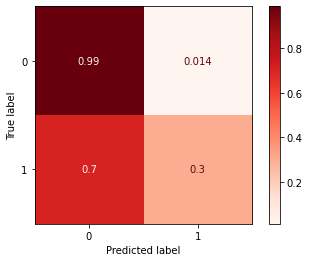

In [34]:
# Plot the Confusion Matrix prediction percentages
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Reds, normalize='true')

In [35]:
# Print classification report
print(classification_report(y_test, y_pred,target_names=["Malignant", "Benign"]))

              precision    recall  f1-score   support

   Malignant       0.88      0.99      0.93       370
      Benign       0.81      0.30      0.43        71

    accuracy                           0.88       441
   macro avg       0.84      0.64      0.68       441
weighted avg       0.87      0.88      0.85       441

